### Mount Drive and create insital structre








In [3]:
from google.colab import drive
from pathlib import Path

drive.mount('/content/drive')

BASE_DIR = Path('/content/drive/MyDrive/Music_Genre_Classification/MagnaTagATune')
BASE_DIR.mkdir(parents=True, exist_ok=True)
RAW_DIR  = BASE_DIR / 'OpenDataLab___MagnaTagATune' / 'raw'
AUDIO_DIR = BASE_DIR / 'audio'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install --no-deps openxlab


import openxlab

openxlab.login(
    ak="9jd8xnlx1mb96eynv0b3",
    sk="k51wvjbxevza8e0rpdjlpv8xgrdlpny4jo3amg9g",
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.5/314.5 kB 6.2 MB/s eta 0:00:00


In [5]:
from pathlib import Path
from openxlab.dataset import get

get(
    dataset_repo='OpenDataLab/MagnaTagATune',
    target_path=str(BASE_DIR)
)

开始执行get命令，数据集仓库: OpenDataLab/MagnaTagATune
数据集将保存到: /content/drive/MyDrive/Music_Genre_Classification/MagnaTagATune


Fetching the list of datasets...

文件列表获取完成，共 10 个文件


Downloading 10 files:

1. file: README.md, size: 1.34K, progress: 100%

Total progress: 0%, total files:1/10, downloaded size: 1.3K, total size: 3.1G

2. file: metafile.yaml, size: 406.00B, progress: 100%

Total progress: 0%, total files:2/10, downloaded size: 1.7K, total size: 3.1G

3. file: raw/annotations_final.csv, size: 20.52M, progress: 100%

Total progress: 1%, total files:3/10, downloaded size: 20.5M, total size: 3.1G

4. file: raw/clip_info_final.csv, size: 8.21M, progress: 100%

Total progress: 1%, total files:4/10, downloaded size: 28.7M, total size: 3.1G

5. file: raw/clip_info_final.sql.zip, size: 881.95K, progress: 100%

Total progress: 1%, total files:5/10, downloaded size: 29.6M, total size: 3.1G

6. file: raw/comparisons_final.csv, size: 128.85K, progress: 100%

Total progress: 1%, total files:6/10, downloaded size: 29.7M, total size: 3.1G

7. file: raw/mp3.zip.001, size: 1.02G, progress: 100%

Total progress: 33%, total files:7/10, downloaded size: 1.1G, total size: 3.1G

8. file: raw/mp3.zip.002, size: 1.02G, progress: 100%

Total progress: 66%, total files:8/10, downloaded size: 2.1G, total size: 3.1G

9. file: raw/mp3.zip.003, size: 736.97M, progress: 100%

Total progress: 89%, total files:9/10, downloaded size: 2.8G, total size: 3.1G

10. file: raw/mp3_echonest_xml.zip, size: 359.90M, progress: 100%

Total progress: 100%, total files:10/10, downloaded size: 3.1G, total size: 3.1G

Download Completed.

The folder has been successfully downloaded to 
/content/drive/MyDrive/Music_Genre_Classification/MagnaTagATune/OpenDataLab___MagnaTagATune/raw

In [6]:
!ls -R BASE_DIR


ls: cannot access 'BASE_DIR': No such file or directory


In [7]:
import os, shutil, subprocess
from pathlib import Path

# Combine split files into one zip
combined_zip = RAW_DIR / 'mp3_full.zip'

with open(combined_zip, 'wb') as w:
    for part_name in ['mp3.zip.001', 'mp3.zip.002', 'mp3.zip.003']:
        part_path = RAW_DIR / part_name
        with open(part_path, 'rb') as f:
            shutil.copyfileobj(f, w)

print("Combined zip created at:", combined_zip)

# Unzip into AUDIO_DIR
import zipfile
with zipfile.ZipFile(combined_zip, 'r') as z:
    z.extractall(AUDIO_DIR)

print("Extracted audio to:", AUDIO_DIR)


Combined zip created at: /content/drive/MyDrive/Music_Genre_Classification/MagnaTagATune/OpenDataLab___MagnaTagATune/raw/mp3_full.zip
Extracted audio to: /content/drive/MyDrive/Music_Genre_Classification/MagnaTagATune/audio


In [8]:
!ls -R "/content/drive/MyDrive/Music_Genre_Classification/MagnaTagATune/audio" | head -40


/content/drive/MyDrive/Music_Genre_Classification/MagnaTagATune/audio:
0
1
2
3
4
5
6
7
8
9
a
b
c
d
e
f

/content/drive/MyDrive/Music_Genre_Classification/MagnaTagATune/audio/0:
american_bach_soloists-joseph_haydn__masses-01-kyrie__allegro_moderato-146-175.mp3
american_bach_soloists-joseph_haydn__masses-01-kyrie__allegro_moderato-204-233.mp3
american_bach_soloists-joseph_haydn__masses-01-kyrie__allegro_moderato-233-262.mp3
american_bach_soloists-joseph_haydn__masses-01-kyrie__allegro_moderato-30-59.mp3
american_bach_soloists-joseph_haydn__masses-01-kyrie__allegro_moderato-59-88.mp3
american_bach_soloists-joseph_haydn__masses-01-kyrie__allegro_moderato-88-117.mp3
american_bach_soloists-joseph_haydn__masses-02-gloria__allegro-117-146.mp3
american_bach_soloists-joseph_haydn__masses-02-gloria__allegro-146-175.mp3
american_bach_soloists-joseph_haydn__masses-02-gloria__allegro-175-204.mp3
american_bach_soloists-joseph_haydn__masses-02-gloria__allegro-59-88.mp3
american_bach_soloists-joseph_ha

In [10]:
import pandas as pd
ann_path = RAW_DIR / 'annotations_final.csv'
ann = pd.read_csv(ann_path, sep='\t')
ann.head()


,clip_id,no voice,singer,duet,plucking,hard rock,world,bongos,harpsichord,female singing,...,rap,metal,hip hop,quick,water,baroque,women,fiddle,english,mp3_path
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...
2,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...
3,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...
4,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...


In [11]:
MP3_COL = 'mp3_path'
ann['audio_path'] = ann[MP3_COL].apply(
    lambda rel: str(AUDIO_DIR / rel)  # AUDIO_DIR / "0/american_bach-...mp3"
)
ann[['audio_path']].head()


,audio_path
0,/content/drive/MyDrive/Music_Genre_Classificat...
1,/content/drive/MyDrive/Music_Genre_Classificat...
2,/content/drive/MyDrive/Music_Genre_Classificat...
3,/content/drive/MyDrive/Music_Genre_Classificat...
4,/content/drive/MyDrive/Music_Genre_Classificat...


In [12]:
# Columns that are NOT tags
non_tag_cols = ['clip_id', MP3_COL, 'audio_path']
non_tag_cols = [c for c in non_tag_cols if c in ann.columns]

candidate_tag_cols = [c for c in ann.columns if c not in non_tag_cols]

tag_cols = []
for c in candidate_tag_cols:
    vals = ann[c].dropna().unique()
    if len(vals) <= 3 and set(vals).issubset({0, 1}):
        tag_cols.append(c)

len(tag_cols), tag_cols[:20]


(188,
 ['no voice',
  'singer',
  'duet',
  'plucking',
  'hard rock',
  'world',
  'bongos',
  'harpsichord',
  'female singing',
  'clasical',
  'sitar',
  'chorus',
  'female opera',
  'male vocal',
  'vocals',
  'clarinet',
  'heavy',
  'silence',
  'beats',
  'men'])

In [13]:
tag_freq = ann[tag_cols].sum().sort_values(ascending=False)

MIN_COUNT = 50
selected_tags = tag_freq[tag_freq >= MIN_COUNT].index.tolist()
len(selected_tags), selected_tags[:20]


(176,
 ['guitar',
  'classical',
  'slow',
  'techno',
  'strings',
  'drums',
  'electronic',
  'rock',
  'fast',
  'piano',
  'ambient',
  'beat',
  'violin',
  'vocal',
  'synth',
  'female',
  'indian',
  'opera',
  'male',
  'singing'])

In [14]:
def row_to_tags(row):
    return ' '.join([t for t in selected_tags if row[t] == 1])

df_tags = pd.DataFrame({
    'audio_path': ann['audio_path'],
    # optional: keep clip_id if it exists
    'clip_id': ann['clip_id'] if 'clip_id' in ann.columns else ann.index,
    'tags': ann.apply(row_to_tags, axis=1),
})

# Drop clips with no selected tags
df_tags = df_tags[df_tags['tags'].str.len() > 0].reset_index(drop=True)
df_tags.head(), df_tags.shape


(                                          audio_path  clip_id  \
 0  /content/drive/MyDrive/Music_Genre_Classificat...        2   
 1  /content/drive/MyDrive/Music_Genre_Classificat...        6   
 2  /content/drive/MyDrive/Music_Genre_Classificat...       10   
 3  /content/drive/MyDrive/Music_Genre_Classificat...       11   
 4  /content/drive/MyDrive/Music_Genre_Classificat...       12   
 
                                                 tags  
 0                     classical strings violin opera  
 1  classical strings violin opera classic violins...  
 2                            classical opera classic  
 3                                        opera quiet  
 4           classical strings violin classic violins  ,
 (21638, 3))

In [15]:
from pathlib import Path
Path(df_tags.loc[0, 'audio_path']).exists()


True

In [16]:
from sklearn.model_selection import train_test_split

df_train, df_temp = train_test_split(
    df_tags,
    test_size=0.2,
    random_state=42,
    shuffle=True,
)

df_valid, df_test = train_test_split(
    df_temp,
    test_size=0.5,
    random_state=42,
    shuffle=True,
)

df_train['split'] = 'train'
df_valid['split'] = 'valid'
df_test['split']  = 'test'

df_all = pd.concat([df_train, df_valid, df_test], ignore_index=True)
df_all['split'].value_counts()


,count
split,
train,17310
valid,2164
test,2164


In [17]:
import librosa, numpy as np, gc
from PIL import Image

def _normalize_to_01(x):
    x_min, x_max = x.min(), x.max()
    if x_max - x_min < 1e-8:
        return np.zeros_like(x)
    return (x - x_min) / (x_max - x_min)

def _upsample_to_match_height(arr, target_h):
    h, w = arr.shape
    if h == target_h: return arr
    repeat = int(np.ceil(target_h / h))
    arr_rep = np.repeat(arr, repeat, axis=0)
    return arr_rep[:target_h, :]

def audio_to_spectrogram_chunks_return_files(
    audio_path: Path,
    out_dir: Path,
    clip_duration: float = 6.0,
    sr: int = 22050,
    n_mels: int = 256,
    hop_length: int = 512,
    top_db: float = 80.0,
    prefix: str | None = None,
):
    """
    Same as before, but returns a list of saved image Paths.
    """
    try:
        y, sr = librosa.load(audio_path, sr=sr, mono=True)
    except Exception as e:
        print(f"Error loading {audio_path}: {e}")
        return []

    clip_len = int(clip_duration * sr)
    num_clips = len(y) // clip_len
    if num_clips == 0:
        return []

    out_dir.mkdir(parents=True, exist_ok=True)
    saved_paths = []

    base = prefix if prefix is not None else Path(audio_path).stem

    for i in range(num_clips):
        clip = y[i * clip_len : (i + 1) * clip_len]

        # mel
        S_mel = librosa.feature.melspectrogram(
            y=clip, sr=sr, n_mels=n_mels, hop_length=hop_length, power=2.0
        )
        S_mel_db = librosa.power_to_db(S_mel, ref=np.max, top_db=top_db)
        mel_norm = _normalize_to_01(S_mel_db)
        H, W = mel_norm.shape

        # mfcc
        mfcc = librosa.feature.mfcc(y=clip, sr=sr, n_mfcc=40, hop_length=hop_length)
        mfcc_norm = _normalize_to_01(mfcc)
        mfcc_up = _upsample_to_match_height(mfcc_norm, H)

        # chroma
        chroma = librosa.feature.chroma_stft(y=clip, sr=sr, hop_length=hop_length)
        chroma_norm = _normalize_to_01(chroma)
        chroma_up = _upsample_to_match_height(chroma_norm, H)

        stacked = np.stack([mel_norm, mfcc_up, chroma_up], axis=-1)
        stacked_uint8 = (stacked * 255).astype("uint8")
        img = Image.fromarray(stacked_uint8, mode="RGB")

        fname = f"{base}_chunk{i:02d}.png"
        out_path = out_dir / fname
        img.save(out_path)
        saved_paths.append(out_path)

        del clip, S_mel, S_mel_db, mel_norm, mfcc, mfcc_norm, mfcc_up
        del chroma, chroma_norm, chroma_up, stacked, stacked_uint8, img
        gc.collect()

    del y
    gc.collect()
    return saved_paths


In [18]:
from tqdm.auto import tqdm

SPEC_DIR = BASE_DIR / 'spectrograms_v1'
SPEC_DIR.mkdir(parents=True, exist_ok=True)

rows = []

for _, r in tqdm(df_all.iterrows(), total=len(df_all)):
    audio_p = Path(r['audio_path'])
    split   = r['split']
    tags    = r['tags']
    clip_id = str(r['clip_id']) if 'clip_id' in r else Path(r['audio_path']).stem

    out_dir = SPEC_DIR / split
    saved_files = audio_to_spectrogram_chunks_return_files(
        audio_p,
        out_dir,
        clip_duration=6.0,
        prefix=clip_id,
    )

    for f in saved_files:
        rows.append({
            'img_path': str(f),
            'tags': tags,
            'split': split,
        })

df_chunks = pd.DataFrame(rows)
df_chunks.to_csv(BASE_DIR / 'mtat_spectrogram_chunks.csv', index=False)
df_chunks.head(), df_chunks['split'].value_counts()


  0%|          | 0/21638 [00:00<?, ?it/s]

/tmp/ipython-input-500361017.py:69: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(stacked_uint8, mode="RGB")
/usr/local/lib/python3.12/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/tmp/ipython-input-500361017.py:31: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=sr, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error loading /content/drive/MyDrive/Music_Genre_Classification/MagnaTagATune/audio/6/norine_braun-now_and_zen-08-gently-117-146.mp3: 
Error loading /content/drive/MyDrive/Music_Genre_Classification/MagnaTagATune/audio/9/american_baroque-dances_and_suites_of_rameau_and_couperin-25-le_petit_rien_xiveme_ordre_couperin-88-117.mp3: 
Error loading /content/drive/MyDrive/Music_Genre_Classification/MagnaTagATune/audio/8/jacob_heringman-josquin_des_prez_lute_settings-19-gintzler__pater_noster-204-233.mp3: 


(                                            img_path  \
 0  /content/drive/MyDrive/Music_Genre_Classificat...   
 1  /content/drive/MyDrive/Music_Genre_Classificat...   
 2  /content/drive/MyDrive/Music_Genre_Classificat...   
 3  /content/drive/MyDrive/Music_Genre_Classificat...   
 4  /content/drive/MyDrive/Music_Genre_Classificat...   
 
                                  tags  split  
 0  female vocals woman foreign tribal  train  
 1  female vocals woman foreign tribal  train  
 2  female vocals woman foreign tribal  train  
 3  female vocals woman foreign tribal  train  
 4                   techno electronic  train  ,
 split
 train    69232
 valid     8656
 test      8652
 Name: count, dtype: int64)

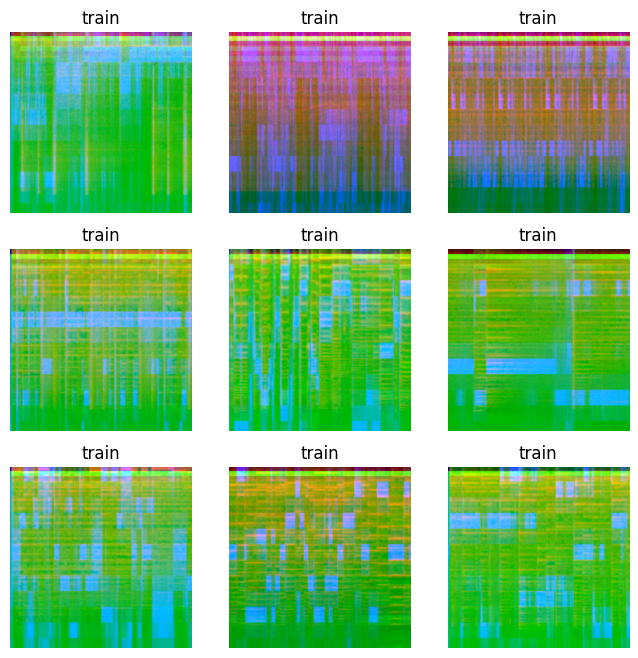

In [19]:
from fastai.vision.all import *
SPEC_DIR = BASE_DIR / 'spectrograms_v1'
spec_train_root = SPEC_DIR / 'train'

dls_check = ImageDataLoaders.from_folder(
    spec_train_root,
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(224)
)

dls_check.show_batch(max_n=9, figsize=(8, 8))
